<a href="https://colab.research.google.com/github/RonakMehta21/Machine-Learning/blob/master/German_Credit_Reports.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#German Credit Reports

### 1. Business Case or Value

When a bank receives a loan application, based on the applicant’s profile the bank has to make a decision regarding whether to go ahead with the loan approval or not. Two types of risks are associated with the bank’s decision –
1. If the applicant is likely to repay the loan, then not approving the loan to the person results in a loss of business to the bank.
2. If the applicant is not likely to repay the loan, then approving the loan to the person results in a financial loss to the bank.

**Objective Function**:
Minimization of risk and maximization of profit on behalf of the bank.

To minimize loss from the bank’s perspective, the bank needs a decision rule regarding who to give approval of the loan and who not to. An applicant’s demographic and socio-economic profiles are considered by loan managers before a decision is taken regarding his/her loan application.

### 2. Data Narative

The '[german.data](http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/)' (original) dataset contains data on 20 variables (7 are numeric and 13 are categorical) and the classification whether an applicant is considered a Good or a Bad credit risk for 1000 loan applicants. 

In this dataset, each entry represents a person who takes a credit by a bank. Each person is classified as good or bad credit risks according to the set of attributes.

A predictive model developed on this data is expected to provide a bank manager guidance for making a decision whether to approve a loan to a prospective applicant based on his/her profiles.

In [0]:
#Import Necessary Libraries
import requests
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO 
from IPython.display import Image 
from pydot import graph_from_dot_data
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.under_sampling import InstanceHardnessThreshold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.neighbors import KNeighborsClassifier
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
import xgboost as xgb
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Read csv file into colaboratory
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/open?id=1YysaBDstCG2KwEzh6tg462Vac-vlz0ru'
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

# Download the dataset from the drive.
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('german.txt')

1YysaBDstCG2KwEzh6tg462Vac-vlz0ru


Load the Dataset

In [0]:
german = pd.read_csv('german.txt',delimiter=' ',header=None)

In [0]:
german.to_csv('german.csv')

In [0]:
df = pd.read_csv('german.csv')

### Data Preprocessing

In [0]:
df = df.drop(['Unnamed: 0'], axis=1)

In [13]:
df.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20'],
      dtype='object')

In [14]:
df.shape

(1000, 21)

In [15]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
dtype: int64

No Null values present in the dataset

In [16]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2


In [0]:
df.columns=['account_check_status','duration_in_month','credit_history','purpose','credit_amount','savings','present_emp_since','installment_as_income_perc','personal_status_sex','other_debtors','present_res_since','property','age','other_installment_plans','housing','credits_this_bank','job','people_under_maintenance','telephone','foreign_worker','status']

In [18]:
df

,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,status
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,4,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,2,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,3,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,4,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,4,A124,53,A143,A153,2,A173,2,A191,A201,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,12,A32,A42,1736,A61,A74,3,A92,A101,4,A121,31,A143,A152,1,A172,1,A191,A201,1
996,A11,30,A32,A41,3857,A61,A73,4,A91,A101,4,A122,40,A143,A152,1,A174,1,A192,A201,1
997,A14,12,A32,A43,804,A61,A75,4,A93,A101,4,A123,38,A143,A152,1,A173,1,A191,A201,1
998,A11,45,A32,A43,1845,A61,A73,4,A93,A101,4,A124,23,A143,A153,1,A173,1,A192,A201,2


We can see that the categorical columns are encoded with an Axxx format, where “x” are integers for different labels. A one-hot encoding of the categorical variables will be required.

We can also see that the numerical variables have different scales, e.g. 6, 48, and 12 in column 2, and 1169, 5951, etc. in column 5. This suggests that scaling of the integer columns will be needed for those algorithms that are sensitive to scale.

In [19]:
# Looking unique values
print(df.nunique())

account_check_status            4
duration_in_month              33
credit_history                  5
purpose                        10
credit_amount                 921
savings                         5
present_emp_since               5
installment_as_income_perc      4
personal_status_sex             4
other_debtors                   3
present_res_since               4
property                        4
age                            53
other_installment_plans         3
housing                         3
credits_this_bank               4
job                             4
people_under_maintenance        2
telephone                       2
foreign_worker                  2
status                          2
dtype: int64


### Exploratory Data Analysis:

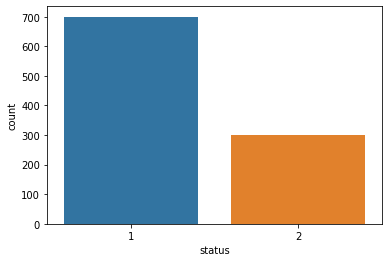

In [20]:
sns.countplot(data=df, x ='status', label='Count')

Most number of people are at Good Credit Risks. But more importantly, the `Status/Target` column is highly imbalanced.

Misclassification errors on the minority class are more important than other types of prediction errors for some imbalanced classification tasks.
Giving a loan to a bad customer marked as a good customer results in a greater cost to the bank than denying a loan to a good customer marked as a bad customer.

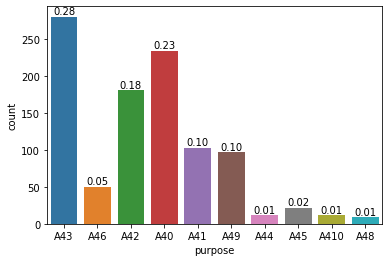

In [21]:
ax = sns.countplot(data=df, x ='purpose', label='Count')
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

Most of the times the purpose of the credit was **Radio/Television** followed by **Car(new)**, **Furniture/Equipment**, and the rest.

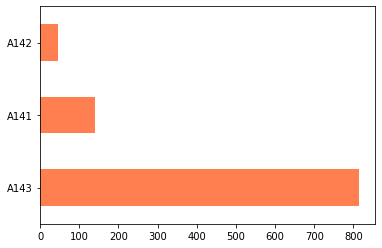

In [22]:
df.other_installment_plans.value_counts().plot(kind='barh',color='coral')
plt.show()

Most of the installment plans were None, followed by Banks and Stores

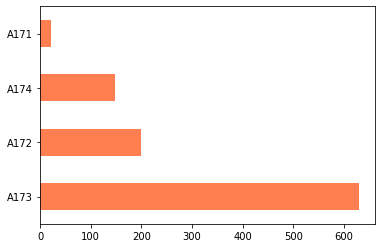

In [23]:
df.job.value_counts().plot(kind='barh',color='coral')
plt.show()

It is evident that most number of people are skilled employee/official.

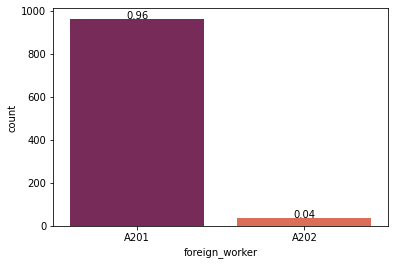

In [24]:
ax = sns.countplot(data=df, x ='foreign_worker', label='Count',palette="rocket")
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

Since number of Non-Foreign Workers are too less, this feature won't contribute to our predictive model.

We can also take a look at the distribution of the seven numerical input variables by creating a histogram for each.

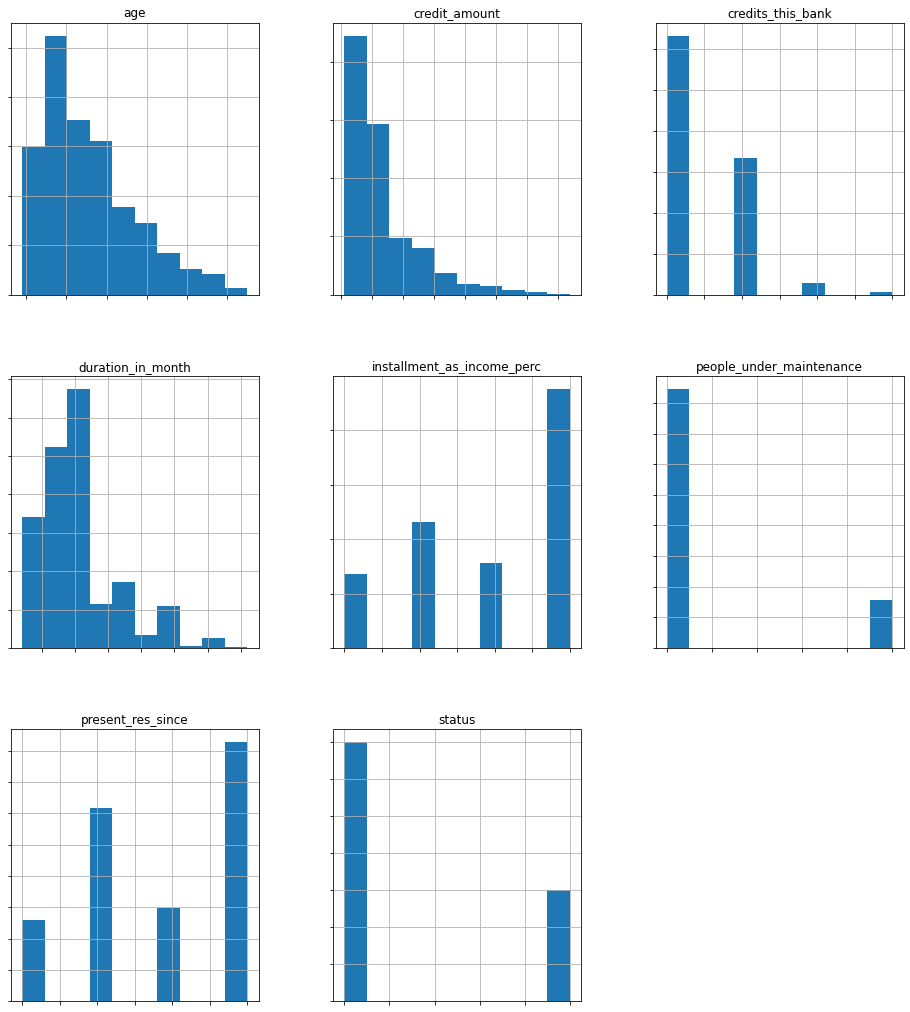

In [25]:
# select columns with numerical data types
num_ix = df.select_dtypes(include=['int64', 'float64']).columns
# select a subset of the dataframe with the chosen columns
subset = df[num_ix]
# create a histogram plot of each numeric variable
ax = subset.hist(figsize = (16,18))
# disable axis labels to avoid the clutter
for axis in ax.flatten():
	axis.set_xticklabels([])
	axis.set_yticklabels([])
# show the plot
plt.show()

In [0]:
# Find the Correlation between various features
cor=df.corr()

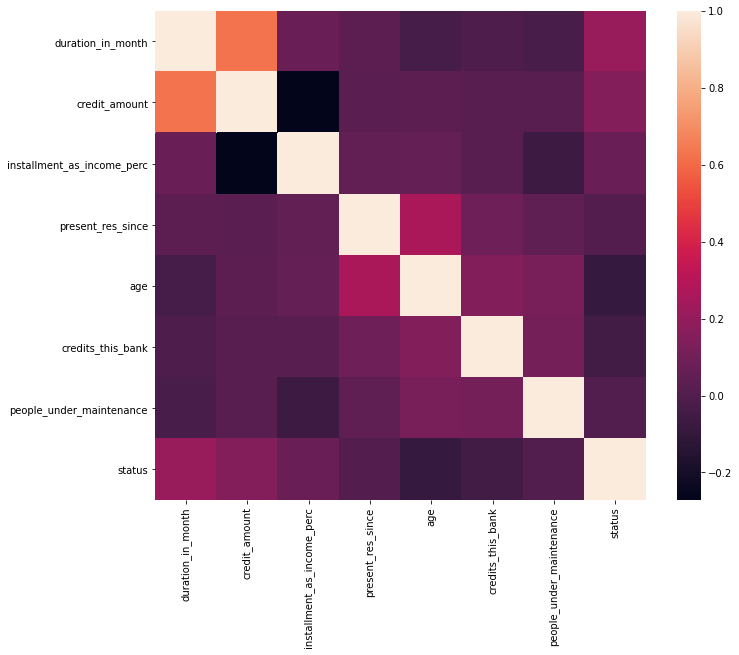

In [27]:
# Heatmap to show the correllation between the features in the dataset
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(cor)

Performing K-Means Clustering as part of EDA

In [0]:
#K-means clustering on fire cause and fire size
data = df[['status','installment_as_income_perc']]

In [64]:
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data)
    Sum_of_squared_distances.append(km.inertia_)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ConvergenceWarning: Number of distinct clusters (8) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  """


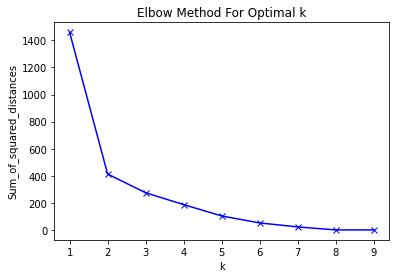

In [65]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

We got optimal K as 2.

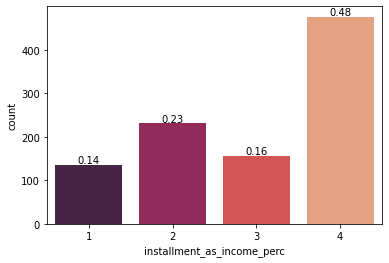

In [66]:
ax = sns.countplot(data=df, x ='installment_as_income_perc', label='Count',palette="rocket")
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center")

K Means gave an accurate result.

#### Silhouette Analysis on KMeans Clustering

For n_clusters = 2 The average silhouette_score is : 0.07595063290704303
For n_clusters = 3 The average silhouette_score is : 0.05726046018573368
For n_clusters = 4 The average silhouette_score is : 0.06319461600782325
For n_clusters = 5 The average silhouette_score is : 0.05950969868596562
For n_clusters = 6 The average silhouette_score is : 0.05871587446254979


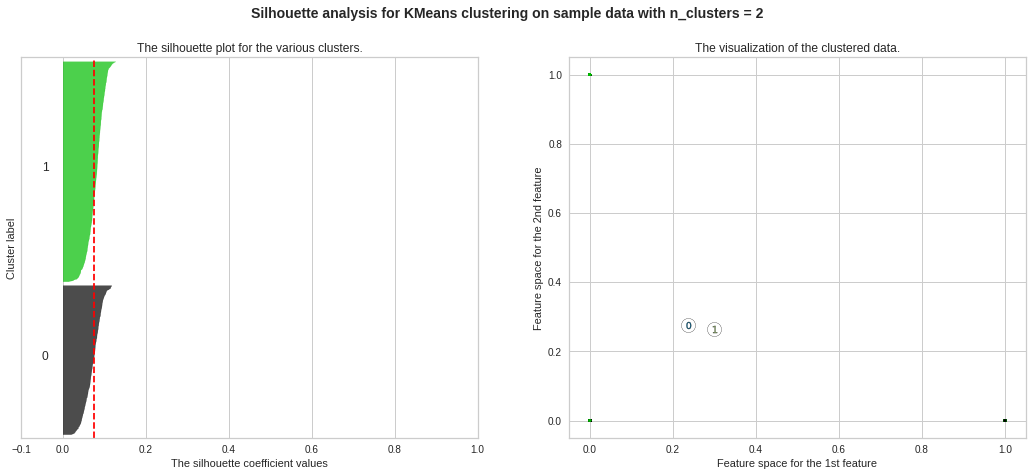

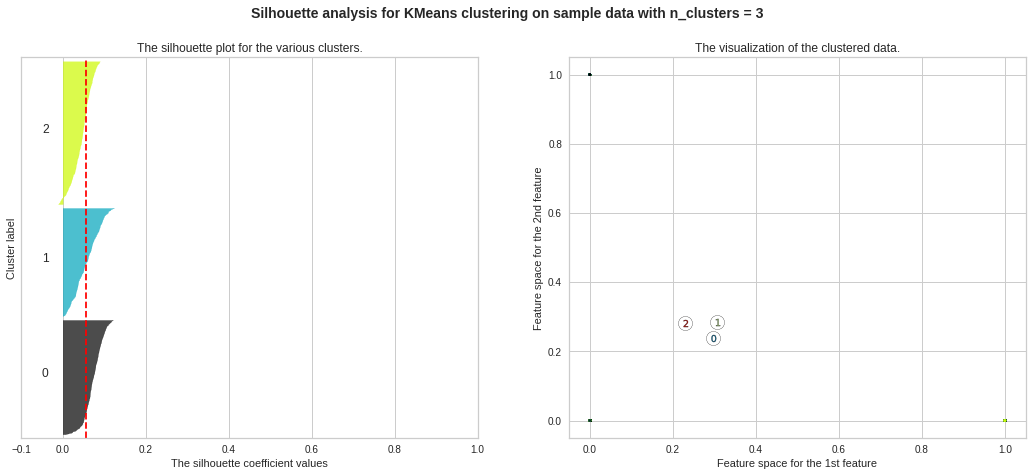

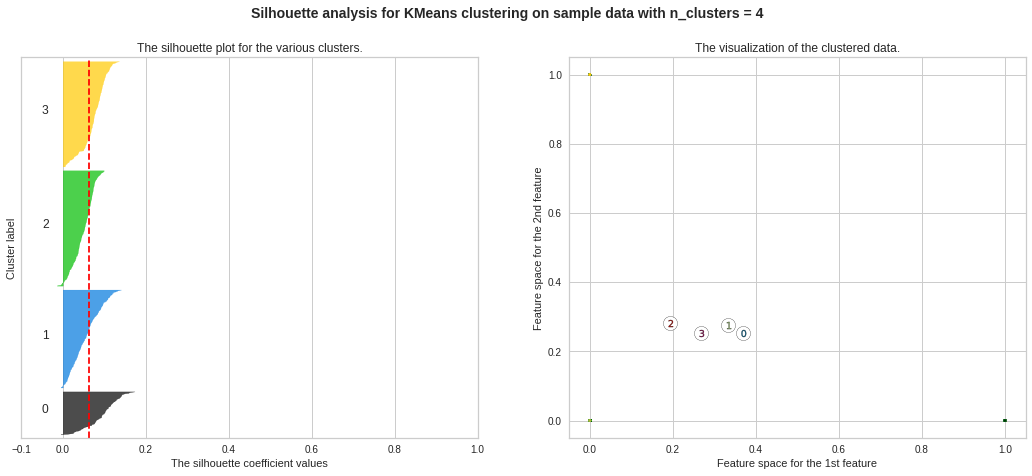

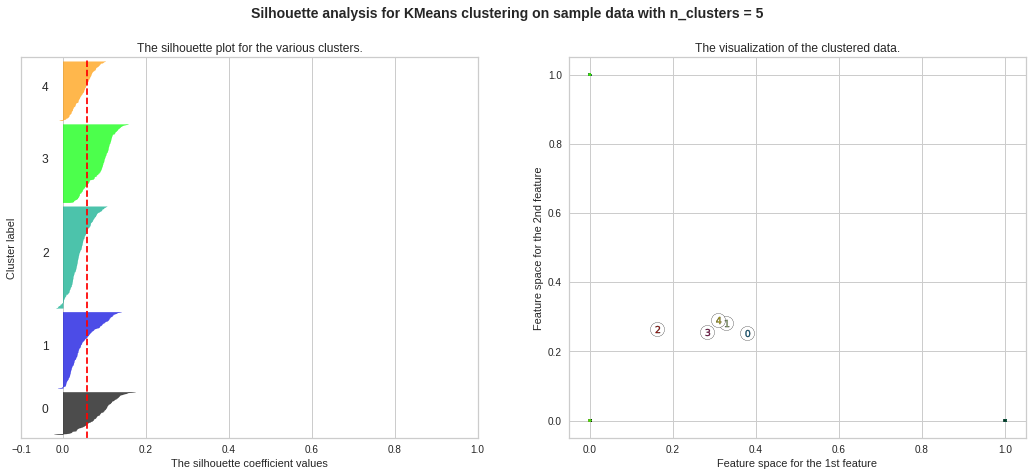

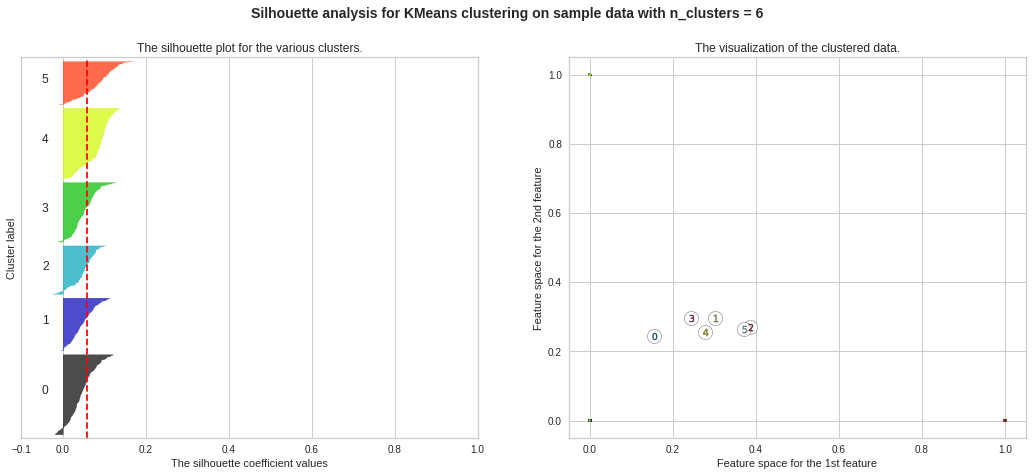

In [75]:
## Source: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
#Split into inputs and output
X = df.loc[:, df.columns != 'status']
Y = df.status

# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

X = pd.DataFrame(data=X)
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
num_ix = X.select_dtypes(include=['int64', 'float64']).columns

# one hot encode categorical features only
# 13 categorical variables were encoded into a total of 54 columns.
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
X = ct.fit_transform(X)
# Label Encode the status/target variable
Y = LabelEncoder().fit_transform(Y)
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

### How many components?

The fact that GMM is a generative model gives us a natural means of determining the optimal number of components for a given dataset.
A generative model is inherently a probability distribution for the dataset, and so we can simply evaluate the *likelihood* of the data under the model, using cross-validation to avoid over-fitting.
Another means of correcting for over-fitting is to adjust the model likelihoods using some analytic criterion such as the [Akaike information criterion (AIC)](https://en.wikipedia.org/wiki/Akaike_information_criterion) or the [Bayesian information criterion (BIC)](https://en.wikipedia.org/wiki/Bayesian_information_criterion).
Scikit-Learn's ``GMM`` estimator actually includes built-in methods that compute both of these, and so it is very easy to operate on this approach.

Let's look at the AIC and BIC as a function as the number of GMM components for our moon dataset:

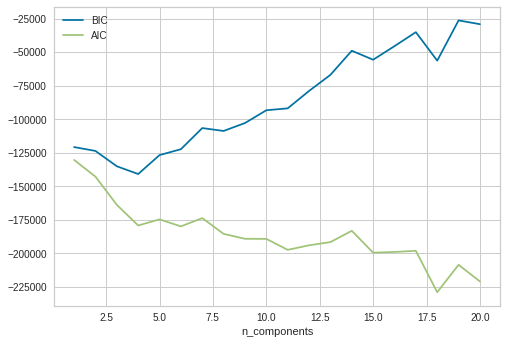

In [79]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

The optimal number of clusters is the value that minimizes the AIC or BIC, depending on which approximation we wish to use. The AIC tells us that our choice of 11 components above was probably too many: around 4-5 components would have been a better choice.
As is typical with this sort of problem, the BIC recommends a simpler model.

**Hence we require 4 or 5 latent variables.**

### Baseline Result with k-fold cross-validation.
We will use k=10, meaning each fold will contain about 1000/10 or 100 examples. In this way it provides a good general estimate of model performance that is not too optimistically biased.

We will predict class labels of whether a customer is good or not. Therefore, we need a measure that is appropriate for evaluating the predicted class labels.

The focus of the task is on the positive class (bad customers). Precision and recall are a good place to start. Maximizing precision will minimize the false positives and maximizing recall will minimize the false negatives in the predictions made by a model.

Using the F-Measure will calculate the harmonic mean between precision and recall. This is a good single number that can be used to compare and select a model on this problem. The issue is that false negatives are more damaging than false positives.

F-Measure = (2 * Precision * Recall) / (Precision + Recall)
Remember that false negatives on this dataset are cases of a bad customer being marked as a good customer and being given a loan. False positives are cases of a good customer being marked as a bad customer and not being given a loan.

False Negative: Bad Customer (class 1) predicted as a Good Customer (class 0).
False Positive: Good Customer (class 0) predicted as a Bad Customer (class 1).
False negatives are more costly to the bank than false positives.

Cost(False Negatives) > Cost(False Positives)

F-measure that calculates a weighted harmonic mean of precision and recall but favors higher recall scores over precision scores. This is called the Fbeta-measure, a generalization of F-measure, where “beta” is a parameter that defines the weighting of the two scores.

Fbeta-Measure = ((1 + beta^2) * Precision * Recall) / (beta^2 * Precision + Recall)
A beta value of 2 will weight more attention on recall than precision and is referred to as the F2-measure.

F2-Measure = ((1 + 2^2) * Precision * Recall) / (2^2 * Precision + Recall)

In [0]:
#Split into inputs and output
X = df.loc[:, df.columns != 'status']
Y = df.status

In [0]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
X = pd.DataFrame(data=X)
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
num_ix = X.select_dtypes(include=['int64', 'float64']).columns

In [0]:
# one hot encode categorical features only
# 13 categorical variables were encoded into a total of 54 columns.
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
X = ct.fit_transform(X)

In [83]:
X.shape

(1000, 61)

In [0]:
# Label Encode the status/target variable
Y = LabelEncoder().fit_transform(Y)

Evaluate the set of predictions using FBeta score where beta is equal to 2.

In [0]:
# calculate f2 score
def f2(y_true, y_pred):
	return fbeta_score(y_true, y_pred, beta=2)

In [0]:
# evaluate a model
def evaluate_model(X, Y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# define the model evaluation the metric
	metric = make_scorer(f2)
	# evaluate model
	scores = cross_val_score(model, X, Y, scoring=metric, cv=cv, n_jobs=-1)
	return scores

A model that predicts the minority class for examples will achieve a maximum recall score and a baseline precision score. This provides a baseline in model performance on this problem by which all other models can be compared.

In [0]:
# define the reference model
#setting the “strategy” argument to “constant” and the “constant” argument to “1” for the minority class.
model = DummyClassifier(strategy='constant', constant=1)

In [88]:
# evaluate the model
scores = evaluate_model(X, Y, model)
# summarize performance
print('Mean F2: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean F2: 0.682 (0.000)


The Mean F2 is 0.682. This is the baseline result. Any Model which is better than this score would perfectly model the german dataset.

Next we will run through several other models and test the Mean F2 score.

In [89]:
## Test various models

# Logistic Regression
LogReg = LogisticRegression()
# Support Vector Machines
SVM = svm.SVC()
# Random Forest
RF = RandomForestClassifier()
# Naive Bayes
NB = GaussianNB()
# K Nearest Neighbors
KNN = KNeighborsClassifier(n_neighbors=2)
# XGBoost Classifier
XGBoost = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, covariance_type="spherical")
# K Means
kmeans = KMeans(n_clusters=2, random_state=0)


# Evaluate the scores
LogReg_scores = evaluate_model(X, Y, LogReg)
SVM_scores = evaluate_model(X, Y, SVM)
RF_scores = evaluate_model(X, Y, RF)
NB_scores = evaluate_model(X, Y, NB)
KNN_scores = evaluate_model(X, Y, KNN)
XGB_scores = evaluate_model(X, Y, XGBoost)
gmm_scores = evaluate_model(X, Y, gmm)
kmeans_scores = evaluate_model(X, Y, kmeans)

# Summarize Performance
print('Logistic Regression Mean F2: %.3f (%.3f)' % (np.mean(LogReg_scores), np.std(LogReg_scores)))
print('Support Vector Machines Mean F2: %.3f (%.3f)' % (np.mean(SVM_scores), np.std(SVM_scores)))
print('Random Forest Classifier Mean F2: %.3f (%.3f)' % (np.mean(RF_scores), np.std(RF_scores)))
print('Naive Bayes Mean F2: %.3f (%.3f)' % (np.mean(NB_scores), np.std(NB_scores)))
print('K Nearest Neighbors Classifier Mean F2: %.3f (%.3f)' % (np.mean(KNN_scores), np.std(KNN_scores)))
print('XGBoost Classifier Mean F2: %.3f (%.3f)' % (np.mean(XGB_scores), np.std(XGB_scores)))
print('Gaussian Mixture Model Mean F2: %.3f (%.3f)' % (np.mean(gmm_scores), np.std(gmm_scores)))
print('K Means Mean F2: %.3f (%.3f)' % (np.mean(kmeans_scores), np.std(kmeans_scores)))

Logistic Regression Mean F2: 0.499 (0.075)
Support Vector Machines Mean F2: 0.434 (0.077)
Random Forest Classifier Mean F2: 0.419 (0.108)
Naive Bayes Mean F2: 0.639 (0.049)
K Nearest Neighbors Classifier Mean F2: 0.270 (0.082)
XGBoost Classifier Mean F2: 0.287 (0.072)
Gaussian Mixture Model Mean F2: 0.428 (0.103)
K Means Mean F2: 0.450 (0.104)


We can see that none of the tested models have an F2-measure above the default of predicting the majority class in all cases (0.682)

### Performing PCA

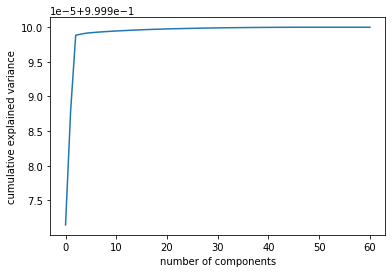

In [54]:
#Split into inputs and output
X = df.loc[:, df.columns != 'status']
Y = df.status
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix)],remainder='passthrough')
X = ct.fit_transform(X)
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

PCA gave 2 components having the highest variance.

In [62]:
pca.explained_variance_

array([7.96790062e+06, 1.30897422e+02, 8.73544315e+01, 1.21829885e+00,
       1.05634132e+00, 5.94628419e-01, 4.89042267e-01, 4.28936848e-01,
       3.92571367e-01, 3.51457202e-01, 3.24726139e-01, 3.11306572e-01,
       2.92002032e-01, 2.78797264e-01, 2.67546670e-01, 2.50279177e-01,
       2.22835595e-01, 2.09167859e-01, 1.96951806e-01, 1.81516747e-01,
       1.69194354e-01, 1.54424149e-01, 1.46943930e-01, 1.37909536e-01,
       1.30941147e-01, 1.26045504e-01, 1.18872257e-01, 1.11139374e-01,
       1.05171523e-01, 9.76005134e-02, 8.30550315e-02, 7.62649427e-02,
       7.10489675e-02, 6.58139985e-02, 6.24119909e-02, 5.72932178e-02,
       5.55006201e-02, 5.31251585e-02, 5.02972431e-02, 4.92283401e-02,
       4.21184954e-02, 3.70119835e-02, 3.19402814e-02, 2.41975850e-02,
       1.92098938e-02, 1.40654542e-02, 1.06714449e-02, 8.84765809e-03,
       7.95092223e-26, 7.95092223e-26, 7.95092223e-26, 7.95092223e-26,
       7.95092223e-26, 7.95092223e-26, 7.95092223e-26, 7.95092223e-26,
      

Further improvements by using a RidgeClassifier instead of LDA and using a StandardScaler for the numeric inputs instead of a MinMaxScaler.

In [90]:
from sklearn.linear_model import RidgeClassifier
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

#Split into inputs and output
X = df.loc[:, df.columns != 'status']
Y = df.status
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
X = pd.DataFrame(data=X)
# Label Encode the status/target variable
Y = LabelEncoder().fit_transform(Y)
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
num_ix = X.select_dtypes(include=['int64', 'float64']).columns

# calculate f2-measure
def f2_measure(y_true, y_pred):
	return fbeta_score(y_true, y_pred, beta=2)
 
# evaluate a model
def evaluate_model(X, y, model):
	# define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	# define the model evaluation metric
	metric = make_scorer(f2_measure)
	# evaluate model
	scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
	return scores

# define model to evaluate
model = RidgeClassifier()
# define the data sampling
sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
# one hot encode categorical, normalize numerical
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',StandardScaler(),num_ix)])
# scale, then sample, then fit model
pipeline = Pipeline(steps=[('t',ct), ('s', sampling), ('m',model)])
# evaluate the model and store results
scores = evaluate_model(X, Y, pipeline)
print('Ridge Classifier Mean F2 Score: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Ridge Classifier Mean F2 Score: 0.739 (0.042)


Ridge Classifier performed the best against all the other models tested above with a Mean F2 Score of (0.725)

In [93]:
from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Algorithm","Mean F2 Score"]
x.add_row(["Ridge Classifier", np.mean(scores)])
x.add_row(["Naive Bayes",np.mean(NB_scores)])
x.add_row(["Logistic Regression",np.mean(LogReg_scores)])
x.add_row(["K Means",np.mean(kmeans_scores)])
x.add_row(["Gaussian Mixture Model",np.mean(gmm_scores)])
x.add_row(["Support Vector Machines",np.mean(RF_scores)])
x.add_row(["XGBoost Classifier",np.mean(XGB_scores)])
x.add_row(["K Nearest Neighbors Classifier",np.mean(KNN_scores)])
print(x)

+--------------------------------+---------------------+
|           Algorithm            |    Mean F2 Score    |
+--------------------------------+---------------------+
|        Ridge Classifier        |  0.7390470086641266 |
|          Naive Bayes           |  0.6391730191702827 |
|      Logistic Regression       |  0.4991911379852895 |
|            K Means             | 0.45048041860484467 |
|     Gaussian Mixture Model     | 0.42829865416320495 |
|    Support Vector Machines     |  0.4189442082129595 |
|       XGBoost Classifier       | 0.28735314932172484 |
| K Nearest Neighbors Classifier | 0.27021977773319183 |
+--------------------------------+---------------------+


Confusion Matrix, Accuracy Score and Classification Report of the models tested before.

In [0]:
#Split into inputs and output
X = df.loc[:, df.columns != 'status']
Y = df.status
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',MinMaxScaler(),num_ix)])
X = ct.fit_transform(X)
Y = LabelEncoder().fit_transform(Y)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [155]:
nb = GaussianNB().fit(X_train, y_train)
y_pred = nb.predict(X_test)
naive = accuracy_score(y_test,y_pred)*100
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ",naive)
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[124  48]
 [ 26  52]]
Accuracy :  70.39999999999999
Report :                precision    recall  f1-score   support

           0       0.83      0.72      0.77       172
           1       0.52      0.67      0.58        78

    accuracy                           0.70       250
   macro avg       0.67      0.69      0.68       250
weighted avg       0.73      0.70      0.71       250



In [156]:
rf = RandomForestClassifier().fit(X_train, y_train)
y_pred = rf.predict(X_test)
random = accuracy_score(y_test,y_pred)*100
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ",random) 
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[160  12]
 [ 45  33]]
Accuracy :  77.2
Report :                precision    recall  f1-score   support

           0       0.78      0.93      0.85       172
           1       0.73      0.42      0.54        78

    accuracy                           0.77       250
   macro avg       0.76      0.68      0.69       250
weighted avg       0.77      0.77      0.75       250



In [157]:
lr = LogisticRegression(solver='lbfgs').fit(X_train, y_train)
y_pred = lr.predict(X_test)
log = accuracy_score(y_test,y_pred)*100
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ",log) 
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[159  13]
 [ 40  38]]
Accuracy :  78.8
Report :                precision    recall  f1-score   support

           0       0.80      0.92      0.86       172
           1       0.75      0.49      0.59        78

    accuracy                           0.79       250
   macro avg       0.77      0.71      0.72       250
weighted avg       0.78      0.79      0.77       250



In [158]:
SVM = svm.SVC()
SVM.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
asvm = accuracy_score(y_test,y_pred)*100
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ",asvm) 
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[165   7]
 [ 47  31]]
Accuracy :  78.4
Report :                precision    recall  f1-score   support

           0       0.78      0.96      0.86       172
           1       0.82      0.40      0.53        78

    accuracy                           0.78       250
   macro avg       0.80      0.68      0.70       250
weighted avg       0.79      0.78      0.76       250



In [159]:
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
knn = accuracy_score(y_test,y_pred)*100
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ",knn) 
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[165   7]
 [ 47  31]]
Accuracy :  78.4
Report :                precision    recall  f1-score   support

           0       0.78      0.96      0.86       172
           1       0.82      0.40      0.53        78

    accuracy                           0.78       250
   macro avg       0.80      0.68      0.70       250
weighted avg       0.79      0.78      0.76       250



In [160]:
XGBoost = xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGBoost.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
axgb = accuracy_score(y_test,y_pred)*100
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ",axgb) 
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[165   7]
 [ 47  31]]
Accuracy :  78.4
Report :                precision    recall  f1-score   support

           0       0.78      0.96      0.86       172
           1       0.82      0.40      0.53        78

    accuracy                           0.78       250
   macro avg       0.80      0.68      0.70       250
weighted avg       0.79      0.78      0.76       250



In [161]:
gmm = GaussianMixture(n_components=2, covariance_type="spherical")
gmm.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
agmm = accuracy_score(y_test,y_pred)*100
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ",agmm) 
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[165   7]
 [ 47  31]]
Accuracy :  78.4
Report :                precision    recall  f1-score   support

           0       0.78      0.96      0.86       172
           1       0.82      0.40      0.53        78

    accuracy                           0.78       250
   macro avg       0.80      0.68      0.70       250
weighted avg       0.79      0.78      0.76       250



In [162]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train, y_train)
y_pred = SVM.predict(X_test)
km = accuracy_score(y_test,y_pred)*100
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ",km) 
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[165   7]
 [ 47  31]]
Accuracy :  78.4
Report :                precision    recall  f1-score   support

           0       0.78      0.96      0.86       172
           1       0.82      0.40      0.53        78

    accuracy                           0.78       250
   macro avg       0.80      0.68      0.70       250
weighted avg       0.79      0.78      0.76       250



In [163]:
from sklearn.linear_model import RidgeClassifier
from imblearn.combine import SMOTEENN
from imblearn.under_sampling import EditedNearestNeighbours

#Split into inputs and output
X = df.loc[:, df.columns != 'status']
Y = df.status
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
X = pd.DataFrame(data=X)
# Label Encode the status/target variable
Y = LabelEncoder().fit_transform(Y)
cat_ix = X.select_dtypes(include=['object', 'bool']).columns
num_ix = X.select_dtypes(include=['int64', 'float64']).columns
# define model to evaluate
model = RidgeClassifier()
# define the data sampling
sampling = SMOTEENN(enn=EditedNearestNeighbours(sampling_strategy='majority'))
# one hot encode categorical, normalize numerical
ct = ColumnTransformer([('c',OneHotEncoder(),cat_ix), ('n',StandardScaler(),num_ix)])
X = ct.fit_transform(X)
X,Y = sampling.fit_resample(X, Y)
X_train, X_test, y_train, y_test = train_test_split(X,Y)
# evaluate the model and store results
model.fit(X,Y)
y_pred = SVM.predict(X_test)
rc = accuracy_score(y_test,y_pred)*100
print("Confusion Matrix: ",confusion_matrix(y_test, y_pred)) 
print ("Accuracy : ",rc) 
print("Report : ",classification_report(y_test, y_pred))

Confusion Matrix:  [[ 78   0]
 [111  58]]
Accuracy :  55.06072874493927
Report :                precision    recall  f1-score   support

           0       0.41      1.00      0.58        78
           1       1.00      0.34      0.51       169

    accuracy                           0.55       247
   macro avg       0.71      0.67      0.55       247
weighted avg       0.81      0.55      0.53       247



/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


## Model Evaluation

In [165]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Algorithm","Mean F2 Score","Accuracy"]
x.add_row(["Ridge Classifier", np.mean(scores),rc])
x.add_row(["Naive Bayes",np.mean(NB_scores),naive])
x.add_row(["Logistic Regression",np.mean(LogReg_scores),log])
x.add_row(["K Means",np.mean(kmeans_scores),km])
x.add_row(["Gaussian Mixture Model",np.mean(gmm_scores),agmm])
x.add_row(["Support Vector Machines",np.mean(RF_scores),asvm])
x.add_row(["XGBoost Classifier",np.mean(XGB_scores),axgb])
x.add_row(["K Nearest Neighbors Classifier",np.mean(KNN_scores),knn])
print(x)

+--------------------------------+---------------------+-------------------+
|           Algorithm            |    Mean F2 Score    |      Accuracy     |
+--------------------------------+---------------------+-------------------+
|        Ridge Classifier        |  0.7390470086641266 | 55.06072874493927 |
|          Naive Bayes           |  0.6391730191702827 | 70.39999999999999 |
|      Logistic Regression       |  0.4991911379852895 |        78.8       |
|            K Means             | 0.45048041860484467 |        78.4       |
|     Gaussian Mixture Model     | 0.42829865416320495 |        78.4       |
|    Support Vector Machines     |  0.4189442082129595 |        78.4       |
|       XGBoost Classifier       | 0.28735314932172484 |        78.4       |
| K Nearest Neighbors Classifier | 0.27021977773319183 |        78.4       |
+--------------------------------+---------------------+-------------------+


## Conclusion:
Logistic Regression, Support Vector Machines, K Nearest Neighbors, K Means, Gaussian Mixture Model, XGBoost Classifier, Random Forest Models performs equivalently better than Naive Bayes and Ridge Classifier.

Even though Ridge Classifier's accuracy is the least, it correctly identifies False Negatives.

